## DATA CRUNCH APP- RECIPE RECOMMENDATION SYSTEM


# Overview
Tech to Tech hub has an aim of creating a recommendation system for a food company called Flavor fields. Flavor fields has a recipes platform they are trying to develop that can give  users personalized recipes based on the ingredients availables.

We aim to create an app called Data Crunch that Flavor fields' users may use to get personalized recipes based on the ingredients available to them. By focusing on a more general dataset, the system will offer a variety of recipes that cater to diverse ingredient lists, dietary preferences, and meal categories.

## Problem statement
More often than not, people tend to have several ingredients in their homes but often find themselves with the big question "what should i cook today". 
Most tend to cook complex, timeconsuming meals that require maximum energy and even end up having to go buy more ingredients to fill up certain recipes they have researched which makes them use much more energy when they simply could have used the ingredients that were available.
This justifies the fact that users  often struggle with meal planning and recipe discovery due to the overwhelming number of options and lack of personalized suggestions. A generalized recipe recommender system will address these challenges by offering tailored recipe suggestions based on the ingredients user's input, thus improving meal planning and reducing food waste.

### Objectives
The main objective is to develop an interactive and user-friendly recommender system that provides personalized recipe suggestions based on user-input ingredients.

Specific Objectives.

•	Dynamic Recipe Matching: Develop an algorithm that matches user-input ingredients with a comprehensive recipe database, offering tailored recipe suggestions.

•   User Interface and Experience Design: Develop an intuitive and user-friendly interface for users to easily browse recipes, read reviews, and receive







### Data understanding
In this project we have two Datasets one obtained from Kaggle and another with reviews obtained from https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset.


The recipe review and user feedback data set contains the following columns:

1. recipe number: {placement of the recipe on the top 100 recipes list}

2. recipe name: {name of the recipe the comment was posted on}

3. recipe code: {unique id of the recipe used by the site}

4. comment id: {unique id of the comment}

5. user id: {unique id of the user who left the comment}

6. user name: {name of the user}

7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}

8. create at: {time at which the comment was posted as a Unix timestamp}

9. reply count: {number of replies to the comment}

10. thumbs up: {number of up-votes the comment has received}

11. thumbs down: {the number of down votes the comment received}

12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}

13. best score: {score of the comment, likely used by the site to help determine the order in the comments that appear in}

14. text: {the text content of the comment}

Apart from the reviews dataset we have the ingredients dataset which contains:

1. A recipe name

2. ingredients

3. Cooking  instructions

It should be noted that despite having recipes in the dataset with ingredients, one may have a few ingredients that could cook more than two meals in the dataset hence this recommender system may come in handy.

# 1. Data cleaning

In [3]:
#Data cleaning
import pandas as pd
import numpy as np


#Tokenization
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

#EDA
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#We load all three datasets
reviews_df = pd.read_csv("Datasets/Recipe Reviews and User Feedback Dataset 2.csv", index_col=0)
recipes_df = pd.read_csv("Datasets/Recipe Ingredients and Cooking Instructions Dataset.csv")



In [5]:
reviews_df.head()


,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [6]:
recipes_df.head()

,recipe_code,recipe_name,ingredients,cooking_instructions
0,14299,Creamy White Chili,"1 lb chicken breast, diced\r\n1 onion, chopped...","1. In a large pot, cook diced chicken breast u..."
1,3309,Best Ever Banana Bread,"2-3 ripe bananas, mashed\r\n1/3 cup melted but...",1. Preheat oven to 350°F (175°C). Grease a 9x5...
2,2832,Cheeseburger Soup,"1 lb ground beef\r\n1 onion, chopped\r\n2 clov...","1. In a large pot, brown ground beef over medi..."
3,17826,Amish Breakfast Casserole,"6 slices bread, cubed\r\n1 lb bulk pork sausag...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
4,42386,Pumpkin Spice Cupcakes with Cream Cheese Frosting,For the cupcakes:\r\n1 1/2 cups all-purpose fl...,For the cupcakes:\r\n1. Preheat oven to 350°F ...


#### 1.1 Reviews dataset

In [7]:
#let's first work with the reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18182 entries, 0 to 118
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18182 non-null  int64 
 1   recipe_code      18182 non-null  int64 
 2   recipe_name      18182 non-null  object
 3   comment_id       18182 non-null  object
 4   user_id          18182 non-null  object
 5   user_name        18182 non-null  object
 6   user_reputation  18182 non-null  int64 
 7   created_at       18182 non-null  int64 
 8   reply_count      18182 non-null  int64 
 9   thumbs_up        18182 non-null  int64 
 10  thumbs_down      18182 non-null  int64 
 11  stars            18182 non-null  int64 
 12  best_score       18182 non-null  int64 
 13  text             18180 non-null  object
dtypes: int64(9), object(5)
memory usage: 2.1+ MB


It is already clear that the text column has two missing values in two of the rows

In [8]:
print(reviews_df.shape)

(18182, 14)


In [9]:
#Let's double check on missing values and just drop since they are only 2 out of 18182 entries
reviews_df.isnull().sum()

recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

In [10]:
reviews_df.duplicated().sum()

0

#### 1.11 To check for completeness and consistency on reviews dataset
We come up with a function that we can use for both the datasets to check for the above two through checking for missing values and duplicates if any

In [11]:


class DataCleaner:
    def __init__(self, df):
        """
        Initializing the DataCleaner with a DataFrame.
        
        Parameters:
        - df (pd.DataFrame): The DataFrame to clean.
        """
        self.df = df

    def drop_missing_values(self, how='any', subset=None):
        """
        Drops rows with missing values from the DataFrame.
        
        - how (str): Determines if a row is dropped when there are missing values:
            - 'any' (default): Drop rows if any NA values are present.
            - 'all': Drop rows if all values are NA.
        - subset (list): List of column names to consider. If None, apply to all columns.
        """
        self.df = self.df.dropna(how=how, subset=subset)

    def remove_duplicates(self, subset=None):
        """
        This is to remove duplicate rows from the DataFrame.
        
        - subset (list): List of column names to consider for duplicates. If None, consider all columns.
        """
        self.df = self.df.drop_duplicates(subset=subset)
    
    def clean_brackets(self, column_name):
        """
        Removes only the brackets from string representations of lists in a column.
        
        - column_name (str): The name of the column to clean.
        """
        # Remove only the square brackets and the quotes, keeping the content intact
        self.df[column_name] = self.df[column_name].apply(lambda x: re.sub(r"^\[|\]$", "", str(x)).replace("'", ""))
    
    def remove_whitespace_rows(self, column_name):
        """
        Removes rows where the specified column contains only whitespace or is empty.
        
        - column_name (str): The name of the column to clean.
        """
        # Remove rows where the column has only whitespace or is empty
        self.df = self.df[~self.df[column_name].apply(lambda x: isinstance(x, str) and x.strip() == '')]

    def clean_data(self, dropna_how='any', dropna_subset=None, remove_duplicates=True, dup_subset=None, clean_brackets_column=None, remove_whitespace_column=None):
        """
        Performs general data cleaning by dropping missing values, removing duplicates, cleaning brackets, and removing whitespace rows.
        
        Parameters:
        - dropna_how (str): How to drop missing values ('any' or 'all').
        - dropna_subset (list): Subset of columns to consider for dropping missing values.
        - remove_duplicates (bool): Whether to remove duplicates (default is True).
        - dup_subset (list): Subset of columns to consider for duplicate removal.
        - clean_brackets_column (str): The name of the column to clean brackets from.
        - remove_whitespace_column (str): The name of the column to remove rows with whitespace or empty strings from.
        
        Returns:
        - pd.DataFrame: The cleaned DataFrame.
        """
        self.drop_missing_values(how=dropna_how, subset=dropna_subset)
        if remove_duplicates:
            self.remove_duplicates(subset=dup_subset)
        if clean_brackets_column:
            self.clean_brackets(clean_brackets_column)
        if remove_whitespace_column:
            self.remove_whitespace_rows(remove_whitespace_column)
        return self.df

      


In [12]:
cleaned_review = DataCleaner(reviews_df)

In [13]:
cleaned_reviews_df = cleaned_review.clean_data(dropna_how='any', remove_duplicates=True)


In [14]:
cleaned_reviews_df.isna().sum()

recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64

In [15]:
print(f'The cleaned_reviews data has {cleaned_reviews_df.isna().sum().sum()} missing values')

The cleaned_reviews data has 0 missing values


In [16]:
cleaned_reviews_df = cleaned_reviews_df.drop(columns=[ 'recipe_code', 'comment_id', 'user_id'])

In [17]:
# converting 'created_at' to datetime
cleaned_reviews_df['created_at'] = pd.to_datetime(cleaned_reviews_df['created_at'], unit='s')


In [18]:
cleaned_reviews_df.head()

,recipe_number,recipe_name,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,Creamy White Chili,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,Creamy White Chili,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,Creamy White Chili,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,Creamy White Chili,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,Creamy White Chili,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


#### 1.2 Second dataset Recipes dataset (checking for completeness)

In [19]:
#let's work on the second dataset the recipes dataframe
recipes_df.isnull().sum()

recipe_code             0
recipe_name             0
ingredients             0
cooking_instructions    0
dtype: int64

In [20]:
recipes_df.duplicated().sum()

0

In [21]:
print(f'The recipes data has {recipes_df.isna().sum().sum()} missing values')

The recipes data has 0 missing values


In [22]:
recipes_df = recipes_df.drop(columns=['recipe_code'])

In [23]:
recipes_df.head()

,recipe_name,ingredients,cooking_instructions
0,Creamy White Chili,"1 lb chicken breast, diced\r\n1 onion, chopped...","1. In a large pot, cook diced chicken breast u..."
1,Best Ever Banana Bread,"2-3 ripe bananas, mashed\r\n1/3 cup melted but...",1. Preheat oven to 350°F (175°C). Grease a 9x5...
2,Cheeseburger Soup,"1 lb ground beef\r\n1 onion, chopped\r\n2 clov...","1. In a large pot, brown ground beef over medi..."
3,Amish Breakfast Casserole,"6 slices bread, cubed\r\n1 lb bulk pork sausag...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
4,Pumpkin Spice Cupcakes with Cream Cheese Frosting,For the cupcakes:\r\n1 1/2 cups all-purpose fl...,For the cupcakes:\r\n1. Preheat oven to 350°F ...


In [24]:
recipes_df.shape

(100, 3)

#### 1.21 Check for uniformity

In [25]:
cleaned_reviews_df.dtypes


recipe_number               int64
recipe_name                object
user_name                  object
user_reputation             int64
created_at         datetime64[ns]
reply_count                 int64
thumbs_up                   int64
thumbs_down                 int64
stars                       int64
best_score                  int64
text                       object
dtype: object

In [26]:
recipes_df.dtypes

recipe_name             object
ingredients             object
cooking_instructions    object
dtype: object

In [27]:
print(f'The second dataset seems to have {recipes_df.isnull().sum().sum()} missing values and {recipes_df.duplicated().sum().sum()} duplicates we will use this later for feature engineering')

The second dataset seems to have 0 missing values and 0 duplicates we will use this later for feature engineering


#### 2. Feature Engineering

In [28]:
#let's first merge our datasets
data = pd.merge(cleaned_reviews_df,recipes_df, on= 'recipe_name', how= 'outer')

In [29]:
data.head()

,recipe_number,recipe_name,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,ingredients,cooking_instructions
0,1,Creamy White Chili,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...","1 lb chicken breast, diced\r\n1 onion, chopped...","1. In a large pot, cook diced chicken breast u..."
1,1,Creamy White Chili,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,"1 lb chicken breast, diced\r\n1 onion, chopped...","1. In a large pot, cook diced chicken breast u..."
2,1,Creamy White Chili,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,"1 lb chicken breast, diced\r\n1 onion, chopped...","1. In a large pot, cook diced chicken breast u..."
3,1,Creamy White Chili,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...","1 lb chicken breast, diced\r\n1 onion, chopped...","1. In a large pot, cook diced chicken breast u..."
4,1,Creamy White Chili,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,"1 lb chicken breast, diced\r\n1 onion, chopped...","1. In a large pot, cook diced chicken breast u..."


In [30]:
#Let's rename the starts columns to ratings for simplicity
data.rename(columns={'stars': 'ratings'}, inplace=True)

In [31]:
# Extract column and create a new 'month' column
data['month'] = data['created_at'].dt.month

#### let's drop more columns that are unnecessary
the text column is not helpful in suggesting any ingredients what we really need is the ingredients to be able to recommned meals based off the recipe name we have assuming the model will be able to come up with similar recipes.

In [32]:
data.drop(columns=['created_at','text','user_name'], inplace=True)

In [33]:
#Let's create a copy of the data named EDA before normalization of text so that we can use it for EDA while the text still makes sense
Eda_data = data.copy()

In [32]:
data.head()

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,ratings,best_score,ingredients,cooking_instructions,month
0,1,Creamy White Chili,1,0,0,0,5,527,"1 lb chicken breast, diced\n1 onion, chopped\n...","1. In a large pot, cook diced chicken breast u...",10
1,1,Creamy White Chili,50,0,7,0,5,724,"1 lb chicken breast, diced\n1 onion, chopped\n...","1. In a large pot, cook diced chicken breast u...",10
2,1,Creamy White Chili,10,0,3,0,5,710,"1 lb chicken breast, diced\n1 onion, chopped\n...","1. In a large pot, cook diced chicken breast u...",9
3,1,Creamy White Chili,1,2,2,0,0,581,"1 lb chicken breast, diced\n1 onion, chopped\n...","1. In a large pot, cook diced chicken breast u...",8
4,1,Creamy White Chili,10,1,7,0,0,820,"1 lb chicken breast, diced\n1 onion, chopped\n...","1. In a large pot, cook diced chicken breast u...",10


## 3 EXPLORATORY DATA ANALYSIS

In [40]:
Eda_data['ingredients_list'] = Eda_data['ingredients'].str.split('\n')

In [41]:

# Count frequency of each ingredient
all_ingredients = Eda_data['ingredients_list'].explode()
ingredient_frequency = Counter(all_ingredients)
ingredient_frequency_df = pd.DataFrame(ingredient_frequency.items(), columns=['Ingredient', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(ingredient_frequency_df)

                                            Ingredient  Frequency
9                           Salt and pepper to taste\r       3753
171                                1/2 teaspoon salt\r       3153
2                            2 cloves garlic, minced\r       2793
1                                   1 onion, chopped\r       2793
149                              1/4 teaspoon pepper\r       2487
..                                                 ...        ...
620                        1 tablespoon chili powder\r         86
619                               1/4 cup lime juice\r         86
621                           1 garlic clove, minced\r         86
442  1/4 cup minced fresh basil or 1 tablespoon dri...         31
441                       8 ounces uncooked linguine\r         31

[645 rows x 2 columns]


# Univariate Analysis

c:\anaconda\conda-meta\theanaconda\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda\conda-meta\theanaconda\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


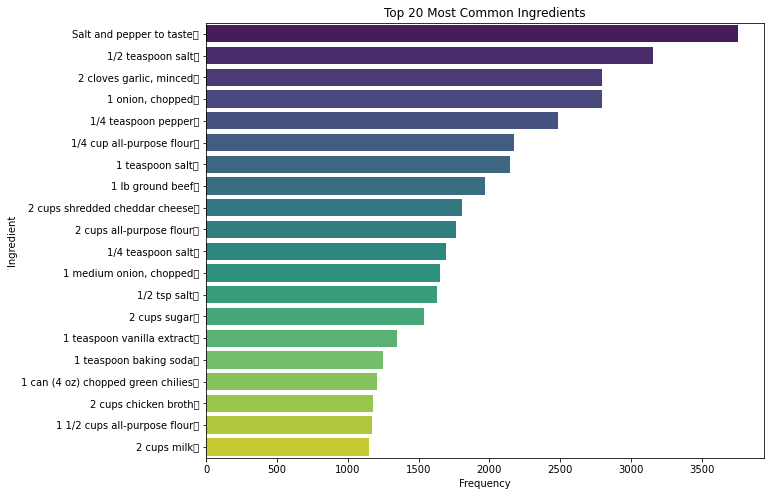

In [42]:
plt.figure(figsize=(10, 8))
top_ingredients = ingredient_frequency_df.head(20)
sns.barplot(x='Frequency', y='Ingredient', data=top_ingredients, palette='viridis')
plt.title('Top 20 Most Common Ingredients')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.show()

# Observation

- Ingredients associated with savory recipes occur at a much higher frequency.

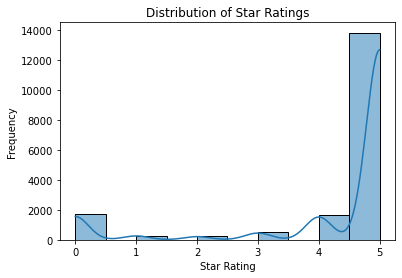

In [44]:
if 'stars' in cleaned_reviews_df.columns:
    sns.histplot(cleaned_reviews_df['stars'], bins=10, kde=True)
    plt.title('Distribution of Star Ratings')
    plt.xlabel('Star Rating')
    plt.ylabel('Frequency')
    plt.show()


# Observations

High satisfaction observed from 5 stars

Notable 'total dissatisfaction' and equal 'almost satisfaction' observed by 0 stars and 4 stars

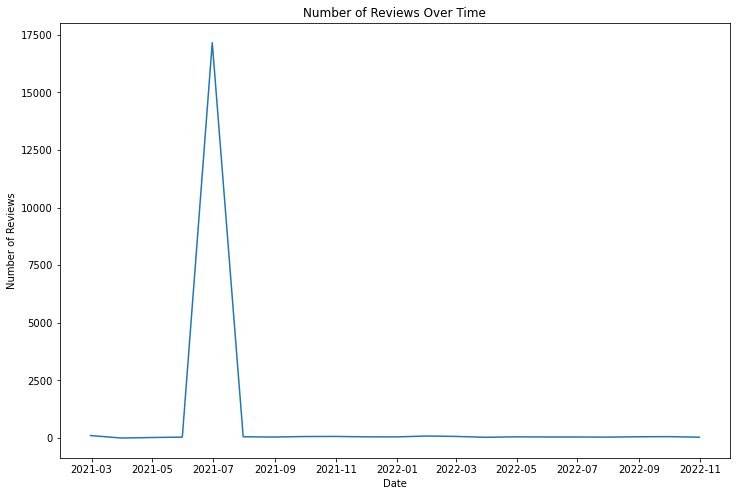

In [45]:
if 'created_at' in cleaned_reviews_df.columns:
    cleaned_reviews_df['created_at'] = pd.to_datetime(cleaned_reviews_df['created_at'])
    reviews_by_date = cleaned_reviews_df.set_index('created_at').resample('M').size()
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=reviews_by_date.index, y=reviews_by_date.values)
    plt.title('Number of Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.show()

# Observation

Data seems to have been collected from the a very short period of time. 

Recommendation

Perhaps get data for a lengthier period to observe trends over time.

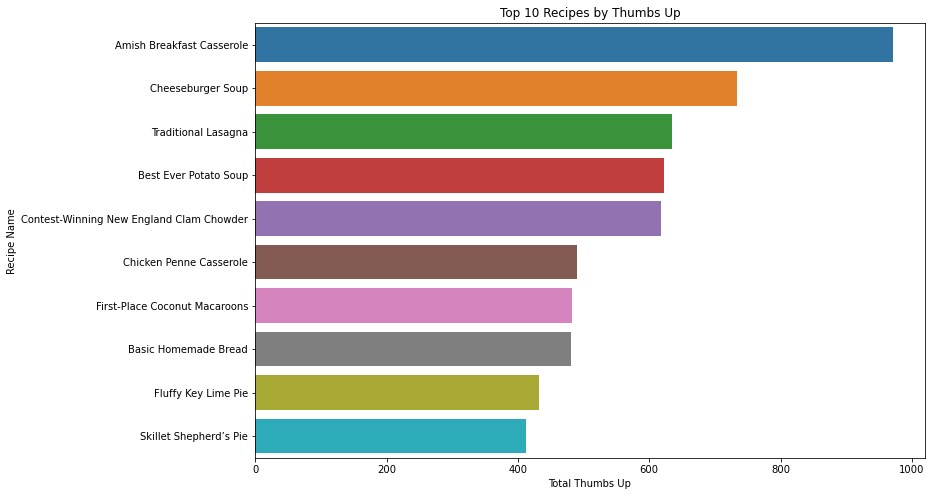

In [46]:
if 'recipe_name' in cleaned_reviews_df.columns and 'thumbs_up' in cleaned_reviews_df.columns:
    top_recipes = cleaned_reviews_df.groupby('recipe_name')['thumbs_up'].sum().nlargest(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_recipes.values, y=top_recipes.index)
    plt.title('Top 10 Recipes by Thumbs Up')
    plt.xlabel('Total Thumbs Up')
    plt.ylabel('Recipe Name')
    plt.show()

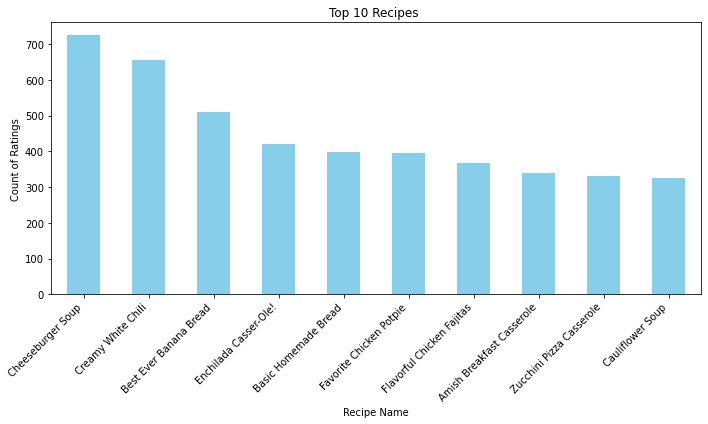

In [51]:
# Group by recipe_name and count the number of ratings
top_10_recipes = data['recipe_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_recipes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Recipes ')
plt.xlabel('Recipe Name')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

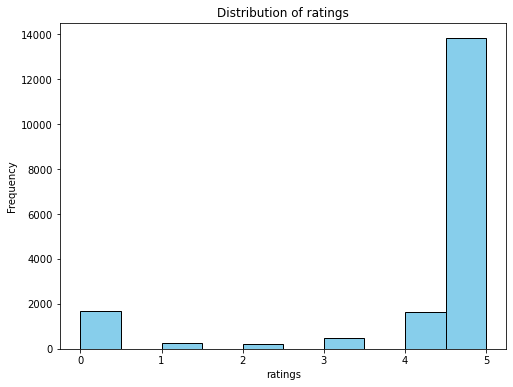

In [53]:
plt.figure(figsize=(8, 6))
plt.hist(data['ratings'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of ratings')
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.show()

# BIVARIATE ANALYSIS

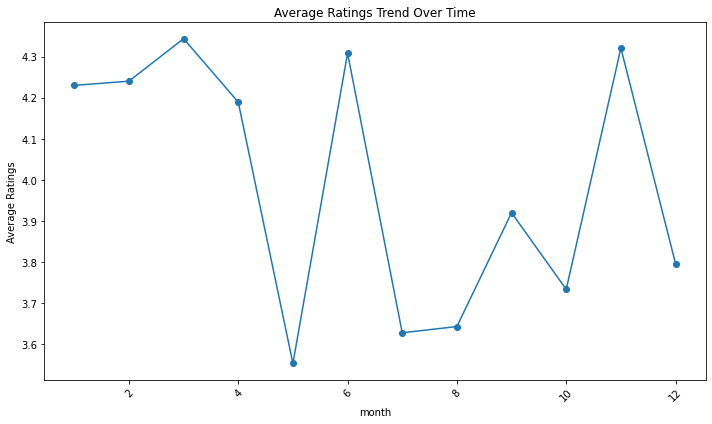

In [55]:
# Grouping by month to calculate average ratings
ratings_trend = data.groupby('month')['ratings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ratings_trend['month'], ratings_trend['ratings'], marker='o')
plt.title('Average Ratings Trend Over Time')
plt.xlabel('month')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

# Observation

- The line shows some fluctuations in the average rating over time.There's a possibility of a slight downward trend in the average rating as the months progress

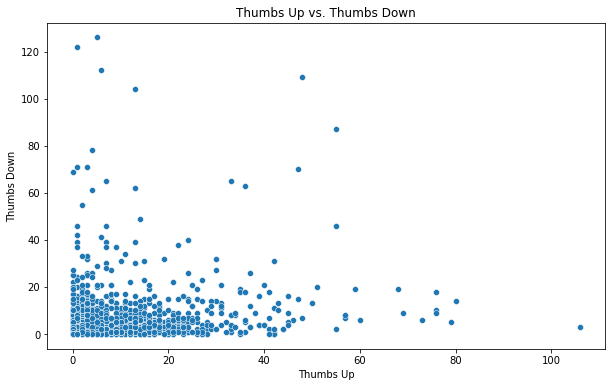

In [56]:
if 'thumbs_up' in cleaned_reviews_df.columns and 'thumbs_down' in cleaned_reviews_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='thumbs_up', y='thumbs_down', data=cleaned_reviews_df)
    plt.title('Thumbs Up vs. Thumbs Down')
    plt.xlabel('Thumbs Up')
    plt.ylabel('Thumbs Down')
    plt.show()

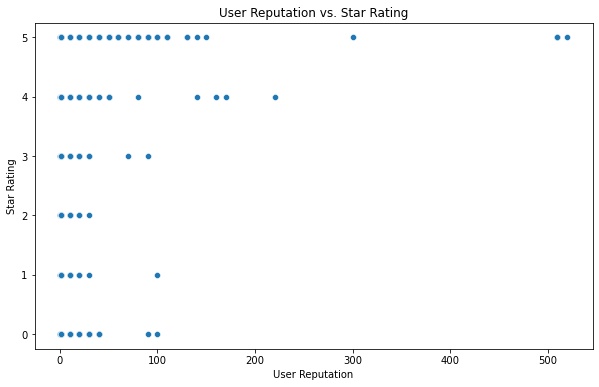

In [57]:
if 'user_reputation' in cleaned_reviews_df.columns and 'stars' in cleaned_reviews_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='user_reputation', y='stars', data=cleaned_reviews_df)
    plt.title('User Reputation vs. Star Rating')
    plt.xlabel('User Reputation')
    plt.ylabel('Star Rating')
    plt.show()

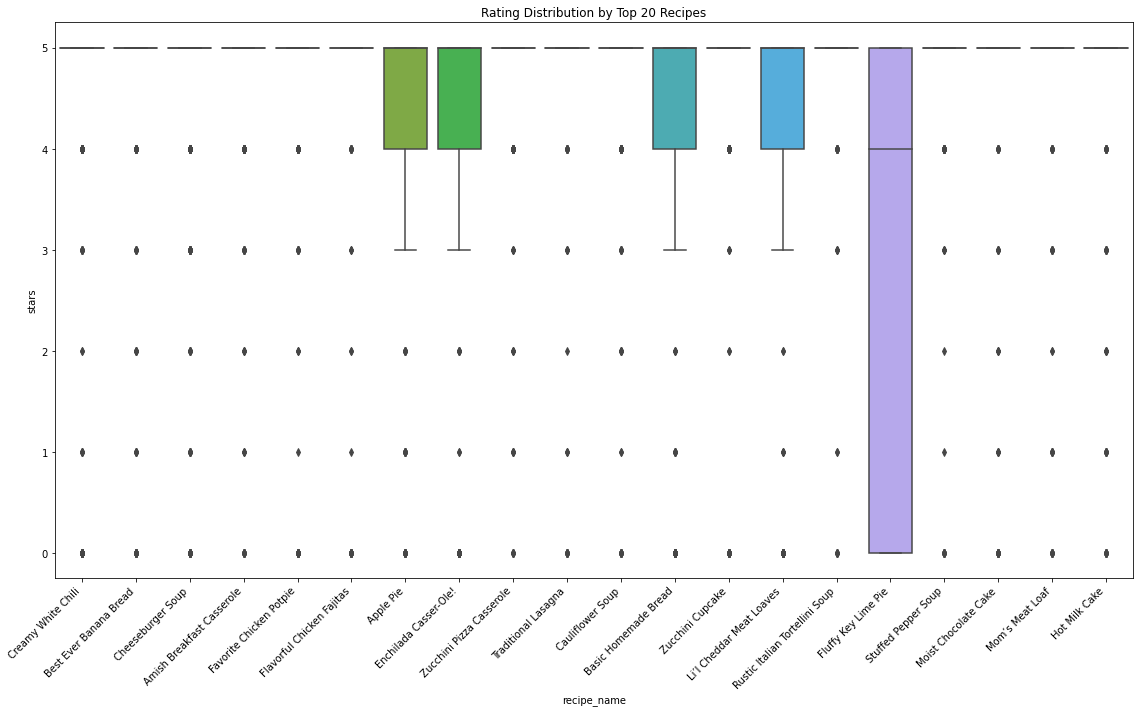

In [59]:
# Count the number of reviews per recipe
top_20_recipes = cleaned_reviews_df['recipe_name'].value_counts().nlargest(20).index

# Filter the dataset to include only the top 20 recipes
filtered_df = cleaned_reviews_df[cleaned_reviews_df['recipe_name'].isin(top_20_recipes)]

# Plotting the boxplot for the top 20 recipes
if 'recipe_name' in cleaned_reviews_df.columns and 'stars' in cleaned_reviews_df.columns:
    plt.figure(figsize=(16, 10))
    sns.boxplot(x='recipe_name', y='stars', data=filtered_df)
    plt.title('Rating Distribution by Top 20 Recipes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
